# Capstone - Delivery-4
This dataset is part of the [Farming Systems Project](https://www.ars.usda.gov/northeast-area/beltsville-md-barc/beltsville-agricultural-research-center/sustainable-agricultural-systems-laboratory/docs/farming-systems-project/) at USDA, Beltsville MD.  This data is not available online on the USDA
 website but can be found on my [GitHub](https://github.com/mmtokay/DATA606/tree/master/dataset)
* Julian Day 
* Month
* Day
* Date
* avgtTempC - average temperature in C
* maxTempC - maximum temperature in C
* minTempC - minimum temperature in C
* maxHumPct - maximum humidity in %
* minHumPct - minimum humidity in %
* avgRadWm-2 - average radiation in w/m2
* meanWindMs-1 - mean wind in m/s
* PrecipitationMm - precipitation/snow me# Model A

In [2]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ngxlr28_
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ngxlr28_
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.09c767b21ec238bb0fe8561f6596f5dcdce915c4e_-cp36-none-any.whl size=100470 sha256=5373bb8b1036d5a11637eabb3033d57ff963da408a19d4a374235c0a3b6e2fc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6r6vynh/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [5]:
!pip install eli5

     |████████████████████████████████| 112kB 3.4MB/s 


In [6]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import warnings
import time
import pathlib
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from datetime import datetime, timedelta
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, Normalizer, MinMaxScaler, StandardScaler, Binarizer
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.utils import shuffle
from time import time
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
from google.colab import drive
drive.mount('/content/drive')

print(tf.__version__)
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
2.2.0-rc4


In [0]:
def modelEvaluation(test_y, y_pred):
    # Mean absolute error regression loss (Best is 0)
    mae = mean_absolute_error(test_y, y_pred)
    print("Mean absolute error regression loss (Best is 0) = {:.5f}".format(mae))
    
    # Mean squared error
    mse = mean_squared_error(test_y, y_pred)
    print("Mean squared error (Best is 0) = {:.5f}".format(mse))
    
    # Median absolute error regression loss
    maerl = median_absolute_error(test_y, y_pred)
    print("Median absolute error regression loss or Mean absolute percentage error (Best is 0) = {:.5f}".format(maerl))
    
    # Coefficient of determination (Best is 1)
    r2 = r2_score(y_pred, test_y)
    print("Coefficient of determination (Best is 1) = {:.5f}".format(r2))

    a = plt.axes(aspect='equal')
    plt.scatter(test_y, y_pred)
    plt.xlabel('True Values [GrainYield]')
    plt.ylabel('Predictions [GrainYield]')
    lims = [0, 6000]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

def errorPlot(test_y, y_pred):
    error = y_pred - test_y
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [GrainYield]")
    _ = plt.ylabel("Count")

# Wheat - 31 weeks

In [8]:
dataWheat31w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/wheatFeatures31w.csv')
corrWheat31w = dataWheat31w.corr()
corrWheat31w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_31w_X, test_31w_X = train_test_split(dataWheat31w.drop('GrainYield', axis=1), random_state=1)
train_31w_y, test_31w_y = train_test_split(dataWheat31w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_31w_X = scaler.fit_transform(train_31w_X)
test_scaler_31w_X = scaler.transform(test_31w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5867003.087475747, tolerance: 16363.260666958082
  positive)


Mean absolute error regression loss (Best is 0) = 437.42190
Mean squared error (Best is 0) = 315310.55645
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 417.41229
Coefficient of determination (Best is 1) = 0.71564
minHum7           292.375377
maxTemp1          282.730771
SystemNameType    282.387262
minTemp15         210.557806
minHum15          208.019960
dtype: float64
avgTemp7    -77.516639
avgTemp5   -108.884755
Precip16   -119.390126
maxTemp6   -126.246467
Precip6    -148.825319
dtype: float64


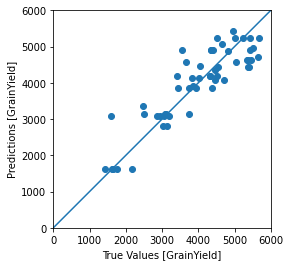

In [10]:
lm = linear_model.Lasso(alpha=0.2)
lm.fit(train_scaler_31w_X,train_31w_y)
y_pred_31w_lm = lm.predict(test_scaler_31w_X)
modelEvaluation(test_31w_y, y_pred_31w_lm)

important_features = pd.Series(data=lm.coef_,index=dataWheat31w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

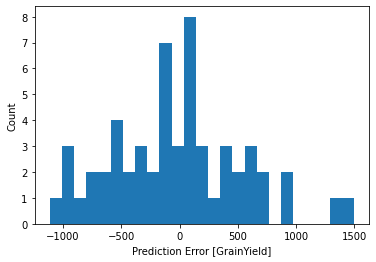

In [11]:
errorPlot(test_31w_y, y_pred_31w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 510.09357
Mean squared error (Best is 0) = 411037.38735
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.29333
Coefficient of determination (Best is 1) = 0.61078
minHum7           292.375377
maxTemp1          282.730771
SystemNameType    282.387262
minTemp15         210.557806
minHum15          208.019960
dtype: float64
avgTemp7    -77.516639
avgTemp5   -108.884755
Precip16   -119.390126
maxTemp6   -126.246467
Precip6    -148.825319
dtype: float64


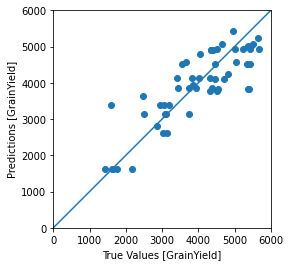

In [12]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_31w_X,train_31w_y)
y_pred_31w_dtr = tree_model.predict(test_scaler_31w_X)
modelEvaluation(test_31w_y, y_pred_31w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataWheat31w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

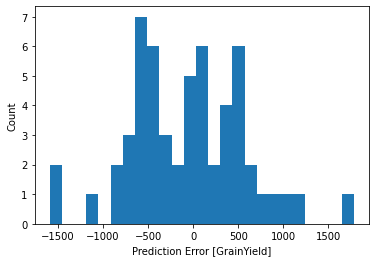

In [13]:
errorPlot(test_31w_y, y_pred_31w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 517.32786
Mean squared error (Best is 0) = 410180.52925
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 453.21367
Coefficient of determination (Best is 1) = 0.59266
minTemp29         0.213952
Precip22          0.097729
SystemNameType    0.084343
minHum8           0.074473
minHum21          0.029558
dtype: float64


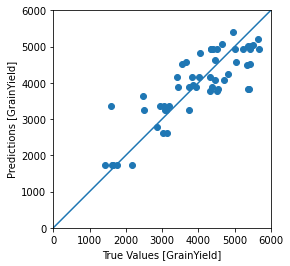

In [14]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_31w_X,train_31w_y)
y_pred_31w_rfr = rf_model.predict(test_scaler_31w_X)
modelEvaluation(test_31w_y, y_pred_31w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat31w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

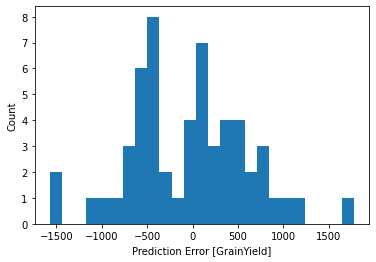

In [15]:
errorPlot(test_31w_y, y_pred_31w_rfr)

Mean absolute error regression loss (Best is 0) = 511.86659
Mean squared error (Best is 0) = 405060.25774
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 440.92102
Coefficient of determination (Best is 1) = 0.58893
minTemp29         0.189169
minHum8           0.093964
Precip22          0.087855
SystemNameType    0.084788
minHum21          0.049602
dtype: float64


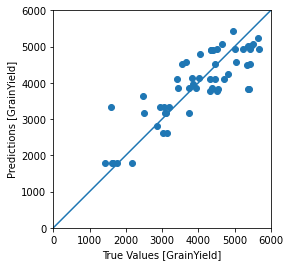

In [16]:
max_depth = 25
n_est = 500
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_31w_X,train_31w_y)
y_pred_31w_rfrc = rf_model.predict(test_scaler_31w_X)
modelEvaluation(test_31w_y, y_pred_31w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat31w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

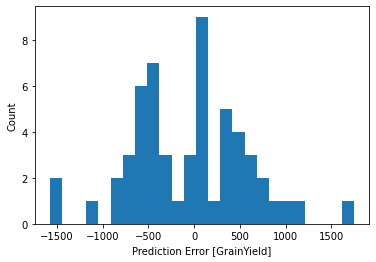

In [17]:
errorPlot(test_31w_y, y_pred_31w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_31w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               28160     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                5

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [21]:
EPOCHS = 200
history = model.fit(train_scaler_31w_X, train_31w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19880650.0000,  mae:4347.8320,  mse:19880650.0000,  val_loss:20237808.0000,  val_mae:4387.5083,  val_mse:20237808.0000,  
....................................................................................................
Epoch: 100, loss:352009.5000,  mae:459.8211,  mse:352009.5000,  val_loss:754347.0625,  val_mae:739.1041,  val_mse:754347.0625,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

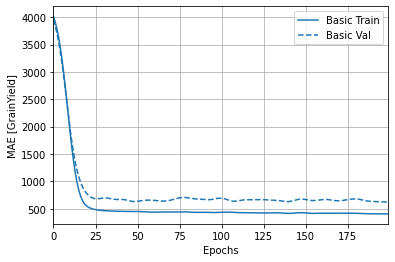

In [23]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

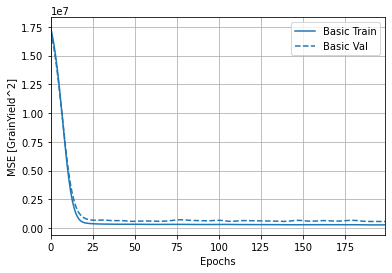

In [24]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [25]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(train_scaler_31w_X, train_31w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19908682.0000,  mae:4350.9590,  mse:19908682.0000,  val_loss:20362508.0000,  val_mae:4401.9922,  val_mse:20362508.0000,  
.....................................

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [26]:
loss, mae, mse = model.evaluate(test_scaler_31w_X, test_31w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

2/2 - 0s - loss: 317179.9688 - mae: 463.5917 - mse: 317179.9688
Testing set Mean Abs Error: 463.59 GrainYield


***Make predictions***

Finally, predict GrainYield values using data in the testing set:

In [0]:
y_pred_31w_nn = model.predict(test_scaler_31w_X).flatten()

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

Mean absolute error regression loss (Best is 0) = 463.59173
Mean squared error (Best is 0) = 317179.95002
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 437.69399
Coefficient of determination (Best is 1) = 0.71536


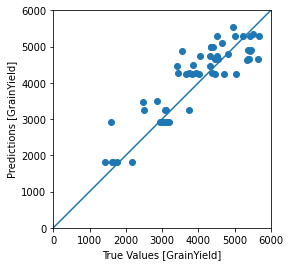

In [28]:
modelEvaluation(test_31w_y, y_pred_31w_nn)

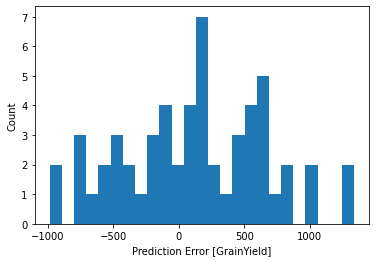

In [29]:
errorPlot(test_31w_y, y_pred_31w_nn)

# Wheat - 30 weeks

In [30]:
dataWheat30w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/wheatFeatures30w.csv')
corrWheat30w = dataWheat30w.corr()
corrWheat30w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_30w_X, test_30w_X = train_test_split(dataWheat30w.drop('GrainYield', axis=1), random_state=1)
train_30w_y, test_30w_y = train_test_split(dataWheat30w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_30w_X = scaler.fit_transform(train_30w_X)
test_scaler_30w_X = scaler.transform(test_30w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27626892.806609023, tolerance: 16363.260666958082
  positive)


Mean absolute error regression loss (Best is 0) = 437.71021
Mean squared error (Best is 0) = 315498.48991
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 417.72196
Coefficient of determination (Best is 1) = 0.71610
maxTemp1    661.290215
maxHum22    543.773021
minTemp7    516.513416
maxHum1     514.539032
minTemp4    434.154560
dtype: float64
Precip14   -419.883831
maxHum25   -437.561955
maxHum14   -456.111038
maxTemp2   -512.006344
maxTemp7   -530.591698
dtype: float64


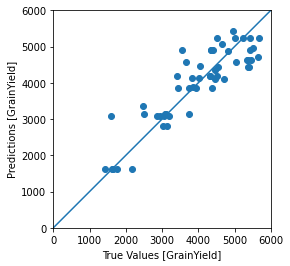

In [32]:
lm = linear_model.Lasso(alpha=-0.05)
lm.fit(train_scaler_30w_X,train_30w_y)
y_pred_30w_lm = lm.predict(test_scaler_30w_X)
modelEvaluation(test_30w_y, y_pred_30w_lm)

important_features = pd.Series(data=lm.coef_,index=dataWheat30w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

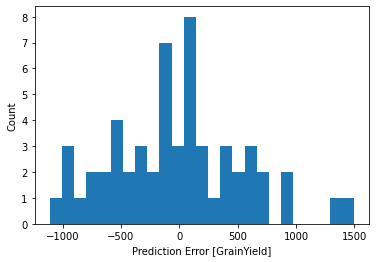

In [33]:
errorPlot(test_30w_y, y_pred_30w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 510.09357
Mean squared error (Best is 0) = 411037.38735
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.29333
Coefficient of determination (Best is 1) = 0.61078
maxTemp1    661.290215
maxHum22    543.773021
minTemp7    516.513416
maxHum1     514.539032
minTemp4    434.154560
dtype: float64
Precip14   -419.883831
maxHum25   -437.561955
maxHum14   -456.111038
maxTemp2   -512.006344
maxTemp7   -530.591698
dtype: float64


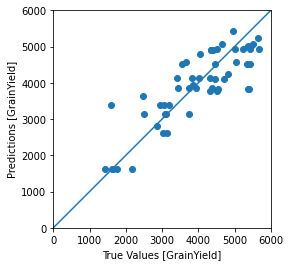

In [34]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_30w_X,train_30w_y)
y_pred_30w_dtr = tree_model.predict(test_scaler_30w_X)
modelEvaluation(test_30w_y, y_pred_30w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataWheat30w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

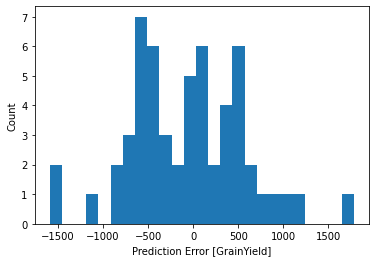

In [35]:
errorPlot(test_30w_y, y_pred_30w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 509.80586
Mean squared error (Best is 0) = 409304.21332
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 453.14825
Coefficient of determination (Best is 1) = 0.59549
minTemp29         0.184545
minHum8           0.100031
SystemNameType    0.088646
Precip22          0.082443
minHum21          0.042028
dtype: float64


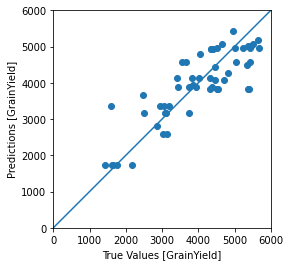

In [36]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_30w_X,train_30w_y)
y_pred_30w_rfr = rf_model.predict(test_scaler_30w_X)
modelEvaluation(test_30w_y, y_pred_30w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat30w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

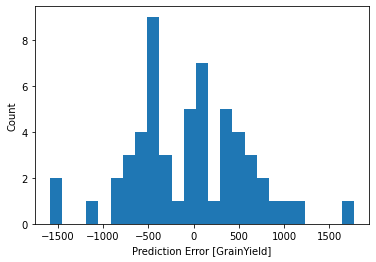

In [37]:
errorPlot(test_30w_y, y_pred_30w_rfr)

Mean absolute error regression loss (Best is 0) = 509.19975
Mean squared error (Best is 0) = 404543.08507
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.91684
Coefficient of determination (Best is 1) = 0.59640
minTemp29         0.191443
minHum8           0.095316
SystemNameType    0.085246
Precip22          0.084857
minHum21          0.050298
dtype: float64


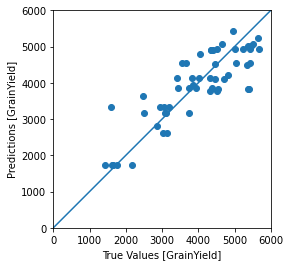

In [38]:
max_depth = 20
n_est = 700
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_30w_X,train_30w_y)
y_pred_30w_rfrc = rf_model.predict(test_scaler_30w_X)
modelEvaluation(test_30w_y, y_pred_30w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat30w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

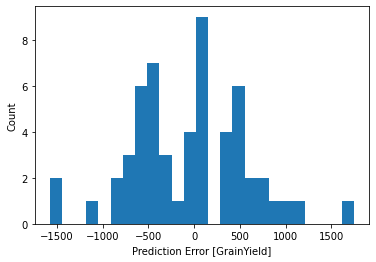

In [39]:
errorPlot(test_30w_y, y_pred_30w_rfrc)

`**Neural Network**

Build the model

Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_30w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               27264     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)               

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [43]:
EPOCHS = 200
history = model.fit(train_scaler_30w_X, train_30w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19885056.0000,  mae:4348.1992,  mse:19885056.0000,  val_loss:20257908.0000,  val_mae:4389.8257,  val_mse:20257908.0000,  
....................................................................................................
Epoch: 100, loss:334602.4062,  mae:454.3347,  mse:334602.4062,  val_loss:630753.1875,  val_mae:697.6312,  val_mse:630753.1875,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

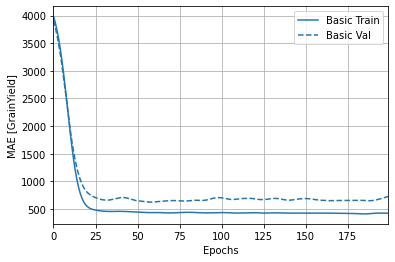

In [46]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

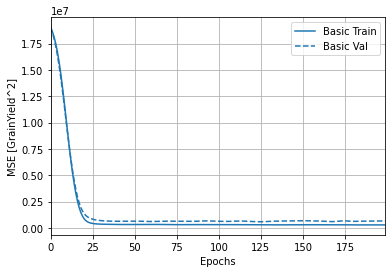

In [44]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [47]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
early_history = model.fit(train_scaler_30w_X, train_30w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19893890.0000,  mae:4349.2837,  mse:19893890.0000,  val_loss:20284970.0000,  val_mae:4393.1104,  val_mse:20284970.0000,  
................................................

In [48]:
loss, mae, mse = model.evaluate(test_scaler_30w_X, test_30w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

2/2 - 0s - loss: 480498.5938 - mae: 523.1685 - mse: 480498.5938
Testing set Mean Abs Error: 523.17 GrainYield


Mean absolute error regression loss (Best is 0) = 523.16847
Mean squared error (Best is 0) = 480498.62641
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 307.07230
Coefficient of determination (Best is 1) = 0.50602


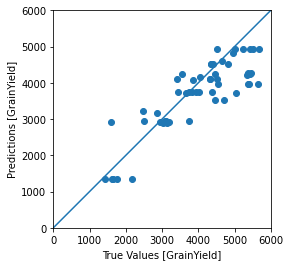

In [49]:
y_pred_30w_nn = model.predict(test_scaler_30w_X).flatten()
modelEvaluation(test_30w_y, y_pred_30w_nn)

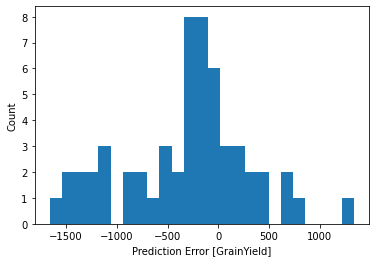

In [50]:
errorPlot(test_30w_y, y_pred_30w_nn)

# Wheat - 29 weeks

In [51]:
dataWheat29w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/wheatFeatures29w.csv')
corrWheat29w = dataWheat29w.corr()
corrWheat29w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_29w_X, test_29w_X = train_test_split(dataWheat29w.drop('GrainYield', axis=1), random_state=1)
train_29w_y, test_29w_y = train_test_split(dataWheat29w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_29w_X = scaler.fit_transform(train_29w_X)
test_scaler_29w_X = scaler.transform(test_29w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13020342.493497038, tolerance: 16363.260666958082
  positive)


Mean absolute error regression loss (Best is 0) = 437.52282
Mean squared error (Best is 0) = 315286.45012
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 417.78547
Coefficient of determination (Best is 1) = 0.71617
maxTemp1          491.131871
SystemNameType    282.438408
minTemp15         211.745764
minHum7           177.638623
minHum5           117.533716
dtype: float64
Precip6     -158.628970
maxTemp2    -161.720902
maxTemp10   -198.728460
minTemp2    -234.126567
maxTemp7    -241.593294
dtype: float64


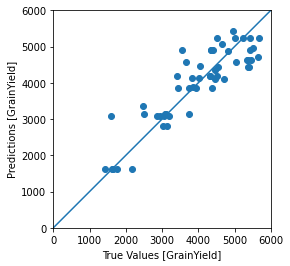

In [53]:
lm = linear_model.Lasso(alpha=0.05)
lm.fit(train_scaler_29w_X,train_29w_y)
y_pred_29w_lm = lm.predict(test_scaler_29w_X)
modelEvaluation(test_29w_y, y_pred_29w_lm)

important_features = pd.Series(data=lm.coef_,index=dataWheat29w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

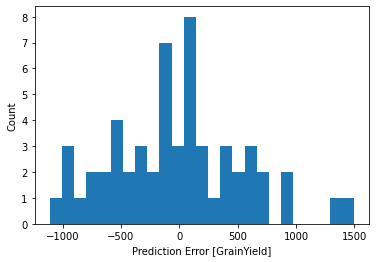

In [54]:
errorPlot(test_29w_y, y_pred_29w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 510.09357
Mean squared error (Best is 0) = 411037.38735
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.29333
Coefficient of determination (Best is 1) = 0.61078
maxTemp1          491.131871
SystemNameType    282.438408
minTemp15         211.745764
minHum7           177.638623
minHum5           117.533716
dtype: float64
Precip6     -158.628970
maxTemp2    -161.720902
maxTemp10   -198.728460
minTemp2    -234.126567
maxTemp7    -241.593294
dtype: float64


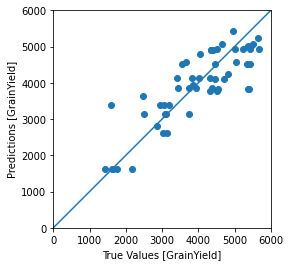

In [55]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_29w_X,train_29w_y)
y_pred_29w_dtr = tree_model.predict(test_scaler_29w_X)
modelEvaluation(test_29w_y, y_pred_29w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataWheat29w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

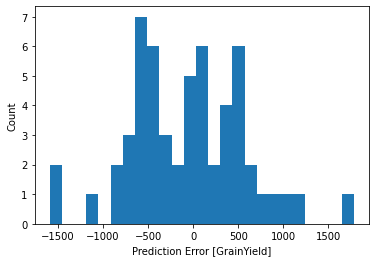

In [56]:
errorPlot(test_29w_y, y_pred_29w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 523.90986
Mean squared error (Best is 0) = 417098.58762
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 449.96248
Coefficient of determination (Best is 1) = 0.56702
minTemp29         0.243133
SystemNameType    0.090011
Precip22          0.086197
minHum8           0.067406
minHum21          0.050573
dtype: float64


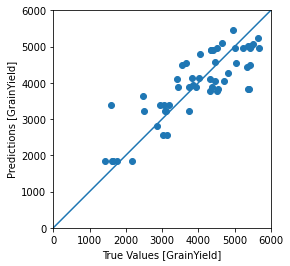

In [57]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_29w_X,train_29w_y)
y_pred_29w_rfr = rf_model.predict(test_scaler_29w_X)
modelEvaluation(test_29w_y, y_pred_29w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat29w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

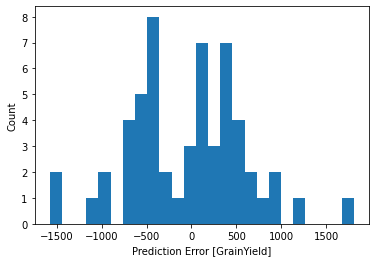

In [58]:
errorPlot(test_29w_y, y_pred_29w_rfr)

Mean absolute error regression loss (Best is 0) = 510.72198
Mean squared error (Best is 0) = 405036.91031
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.77381
Coefficient of determination (Best is 1) = 0.59171
minTemp29         0.192785
minHum8           0.093810
Precip22          0.086912
SystemNameType    0.085391
minHum21          0.052322
dtype: float64


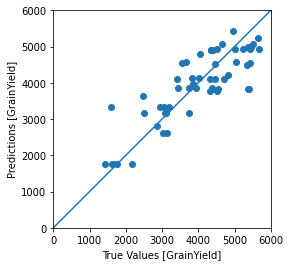

In [59]:
max_depth = 25
n_est = 600
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_29w_X,train_29w_y)
y_pred_29w_rfrc = rf_model.predict(test_scaler_29w_X)
modelEvaluation(test_29w_y, y_pred_29w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat29w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

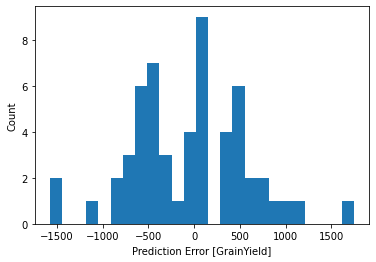

In [60]:
errorPlot(test_29w_y, y_pred_29w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_29w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               26368     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [64]:
EPOCHS = 200
history = model.fit(train_scaler_29w_X, train_29w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19899342.0000,  mae:4349.8242,  mse:19899342.0000,  val_loss:20327868.0000,  val_mae:4398.0620,  val_mse:20327868.0000,  
....................................................................................................
Epoch: 100, loss:284898.2188,  mae:414.6810,  mse:284898.2188,  val_loss:528617.3125,  val_mae:635.8611,  val_mse:528617.3125,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

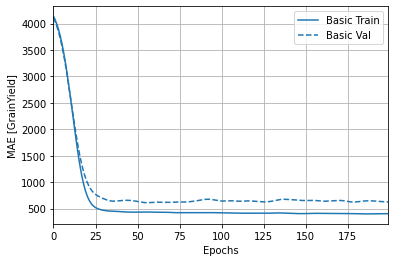

In [66]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

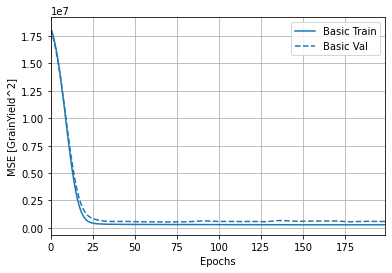

In [67]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [68]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_29w_X, train_29w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19901386.0000,  mae:4350.1104,  mse:19901386.0000,  val_loss:20322794.0000,  val_mae:4397.5474,  val_mse:20322794.0000,  
...................................................................................................

In [69]:
loss, mae, mse = model.evaluate(test_scaler_29w_X, test_29w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

2/2 - 0s - loss: 518711.7188 - mae: 562.6737 - mse: 518711.7188
Testing set Mean Abs Error: 562.67 GrainYield


Mean absolute error regression loss (Best is 0) = 562.67373
Mean squared error (Best is 0) = 518711.72292
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 440.70366
Coefficient of determination (Best is 1) = 0.49846


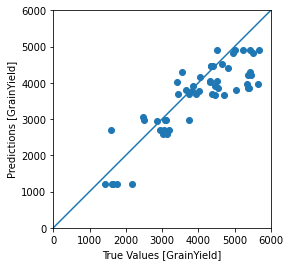

In [70]:
y_pred_29w_nn = model.predict(test_scaler_29w_X).flatten()
modelEvaluation(test_29w_y, y_pred_29w_nn)

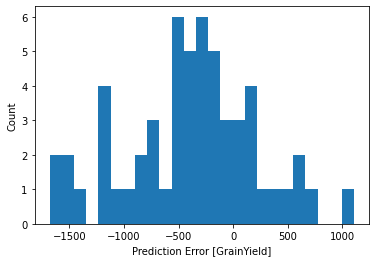

In [71]:
errorPlot(test_29w_y, y_pred_29w_nn)

# Wheat - 28 weeks

In [72]:
dataWheat28w = pd.read_csv('/content/drive/My Drive/DATA606/Delivery-4/wheatFeatures28w.csv')
corrWheat28w = dataWheat28w.corr()
corrWheat28w.style.background_gradient(cmap='coolwarm').set_precision(2)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Splitting data set
train_28w_X, test_28w_X = train_test_split(dataWheat28w.drop('GrainYield', axis=1), random_state=1)
train_28w_y, test_28w_y = train_test_split(dataWheat28w['GrainYield'], random_state=1)

# Apply Robust Scaler
scaler = RobustScaler()
train_scaler_28w_X = scaler.fit_transform(train_28w_X)
test_scaler_28w_X = scaler.transform(test_28w_X)

**Lasso**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13020400.415549379, tolerance: 16363.260666958082
  positive)


Mean absolute error regression loss (Best is 0) = 437.52282
Mean squared error (Best is 0) = 315286.45176
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 417.78546
Coefficient of determination (Best is 1) = 0.71617
maxTemp1          491.143129
SystemNameType    282.438430
minTemp15         211.744970
minHum7           177.634160
minHum5           117.592025
dtype: float64
Precip6     -158.623050
maxTemp2    -161.716557
maxTemp10   -198.728399
minTemp2    -234.135882
maxTemp7    -241.545542
dtype: float64


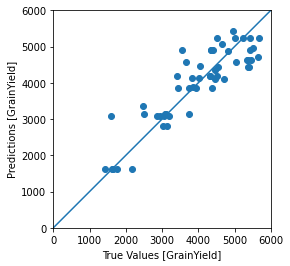

In [74]:
lm = linear_model.Lasso(alpha=0.05)
lm.fit(train_scaler_28w_X,train_28w_y)
y_pred_28w_lm = lm.predict(test_scaler_28w_X)
modelEvaluation(test_28w_y, y_pred_28w_lm)

important_features = pd.Series(data=lm.coef_,index=dataWheat28w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

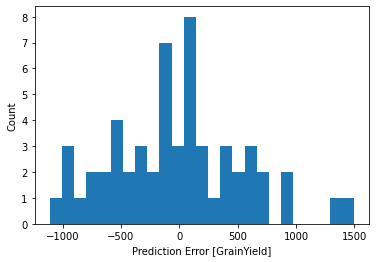

In [75]:
errorPlot(test_28w_y, y_pred_28w_lm)

**Decision Tree Regressor**

Mean absolute error regression loss (Best is 0) = 510.09357
Mean squared error (Best is 0) = 411037.38735
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.29333
Coefficient of determination (Best is 1) = 0.61078
maxTemp1          491.143129
SystemNameType    282.438430
minTemp15         211.744970
minHum7           177.634160
minHum5           117.592025
dtype: float64
Precip6     -158.623050
maxTemp2    -161.716557
maxTemp10   -198.728399
minTemp2    -234.135882
maxTemp7    -241.545542
dtype: float64


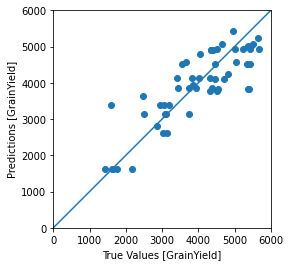

In [76]:
tree_model = DecisionTreeRegressor()
tree_model.fit(train_scaler_28w_X,train_28w_y)
y_pred_28w_dtr = tree_model.predict(test_scaler_28w_X)
modelEvaluation(test_28w_y, y_pred_28w_dtr)

mportant_features = pd.Series(data=tree_model.feature_importances_,index=dataWheat28w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])
print(important_features[-5:])

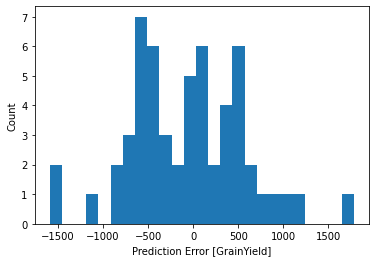

In [77]:
errorPlot(test_28w_y, y_pred_28w_dtr)

**Random Forest Regressor**

Mean absolute error regression loss (Best is 0) = 514.93020
Mean squared error (Best is 0) = 413895.50109
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 452.76052
Coefficient of determination (Best is 1) = 0.57704
minHum8           0.172966
Precip22          0.099779
SystemNameType    0.088994
minHum21          0.087832
maxTemp20         0.047211
dtype: float64


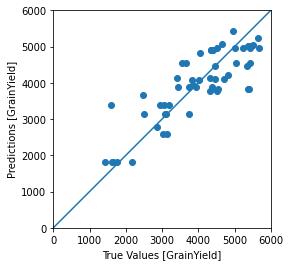

In [78]:
rf_model = RandomForestRegressor()
rf_model.fit(train_scaler_28w_X,train_28w_y)
y_pred_28w_rfr = rf_model.predict(test_scaler_28w_X)
modelEvaluation(test_28w_y, y_pred_28w_rfr)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat28w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

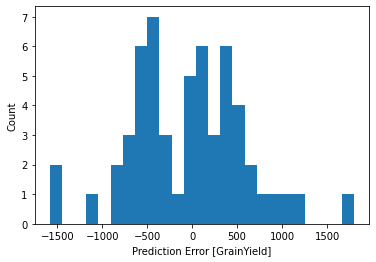

In [79]:
errorPlot(test_28w_y, y_pred_28w_rfr)

Mean absolute error regression loss (Best is 0) = 510.86771
Mean squared error (Best is 0) = 405315.79372
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 441.36262
Coefficient of determination (Best is 1) = 0.59150
minHum8           0.179853
Precip22          0.120888
SystemNameType    0.088236
minHum21          0.050565
maxTemp20         0.028864
dtype: float64


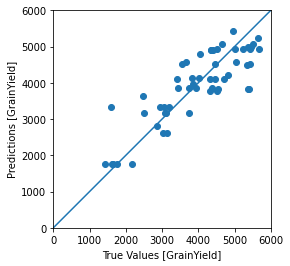

In [80]:
max_depth = 25
n_est = 600
rf_model = RandomForestRegressor(n_estimators=n_est,max_depth=max_depth,random_state=0)
rf_model.fit(train_scaler_28w_X,train_28w_y)
y_pred_28w_rfrc = rf_model.predict(test_scaler_28w_X)
modelEvaluation(test_28w_y, y_pred_28w_rfrc)

important_features = pd.Series(data=rf_model.feature_importances_,index=dataWheat28w.drop('GrainYield', axis=1).columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features[:5])

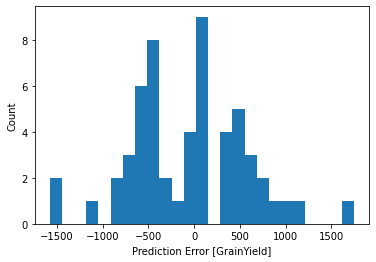

In [81]:
errorPlot(test_28w_y, y_pred_28w_rfrc)

**Neural Network**

***Build the model***


Let's build our model. Here, we'll use a Sequential model with seven densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [0]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_28w_X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [0]:
model = build_model()

***Inspect the model***

Use the .summary method to print a simple description of the model

In [90]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               25472     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
flatten_8 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                

***Train the model***

Train the model for 200 epochs, and record the training and validation accuracy in the history object.

In [91]:
EPOCHS = 200
history = model.fit(train_scaler_28w_X, train_28w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19900734.0000,  mae:4350.0771,  mse:19900734.0000,  val_loss:20309474.0000,  val_mae:4395.9512,  val_mse:20309474.0000,  
....................................................................................................
Epoch: 100, loss:310412.3750,  mae:434.4072,  mse:310412.3750,  val_loss:547885.4375,  val_mae:663.3125,  val_mse:547885.4375,  
....................................................................................................

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [GrainYield]')

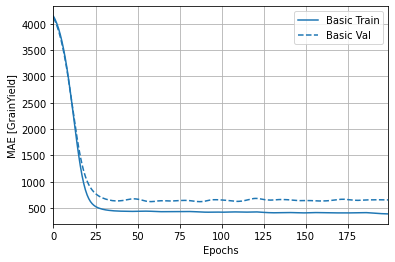

In [93]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [GrainYield]')

Text(0, 0.5, 'MSE [GrainYield^2]')

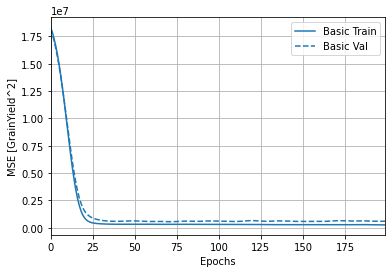

In [94]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE [GrainYield^2]')

In [95]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
early_history = model.fit(train_scaler_28w_X, train_28w_y, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:19903264.0000,  mae:4350.3228,  mse:19903264.0000,  val_loss:20340614.0000,  val_mae:4399.4697,  val_mse:20340614.0000,  
....................................................................................

In [96]:
loss, mae, mse = model.evaluate(test_scaler_28w_X, test_28w_y, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} GrainYield".format(mae))

2/2 - 0s - loss: 292545.6875 - mae: 448.0545 - mse: 292545.6875
Testing set Mean Abs Error: 448.05 GrainYield


Mean absolute error regression loss (Best is 0) = 448.05453
Mean squared error (Best is 0) = 292545.69258
Median absolute error regression loss or Mean absolute percentage error (Best is 0) = 388.61638
Coefficient of determination (Best is 1) = 0.72666


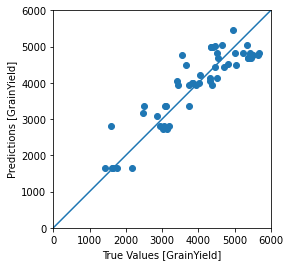

In [97]:
y_pred_28w_nn = model.predict(test_scaler_28w_X).flatten()
modelEvaluation(test_28w_y, y_pred_28w_nn)

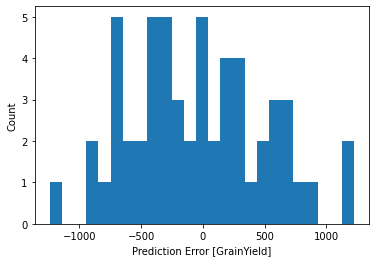

In [98]:
errorPlot(test_28w_y, y_pred_28w_nn)

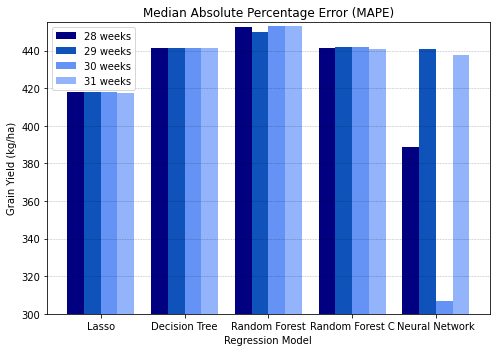

In [110]:
data = np.array([[median_absolute_error(test_28w_y, y_pred_28w_lm), median_absolute_error(test_29w_y, y_pred_29w_lm), median_absolute_error(test_30w_y, y_pred_30w_lm), median_absolute_error(test_31w_y, y_pred_31w_lm)],
                 [median_absolute_error(test_28w_y, y_pred_28w_dtr), median_absolute_error(test_29w_y, y_pred_29w_dtr), median_absolute_error(test_30w_y, y_pred_30w_dtr), median_absolute_error(test_31w_y, y_pred_31w_dtr)],
                 [median_absolute_error(test_28w_y, y_pred_28w_rfr), median_absolute_error(test_29w_y, y_pred_29w_rfr), median_absolute_error(test_30w_y, y_pred_30w_rfr), median_absolute_error(test_31w_y, y_pred_31w_rfr)],
                 [median_absolute_error(test_28w_y, y_pred_28w_rfrc), median_absolute_error(test_29w_y, y_pred_29w_rfrc), median_absolute_error(test_30w_y, y_pred_30w_rfrc), median_absolute_error(test_31w_y, y_pred_31w_rfrc)],
                 [median_absolute_error(test_28w_y, y_pred_28w_nn), median_absolute_error(test_29w_y, y_pred_29w_nn), median_absolute_error(test_30w_y, y_pred_30w_nn), median_absolute_error(test_31w_y, y_pred_31w_nn)]])
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='28 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='29 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='30 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='31 weeks')

ax.set_ylim(300,455)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Grain Yield (kg/ha)')
ax.set_xlabel('Regression Model')
ax.set_title('Median Absolute Percentage Error (MAPE)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

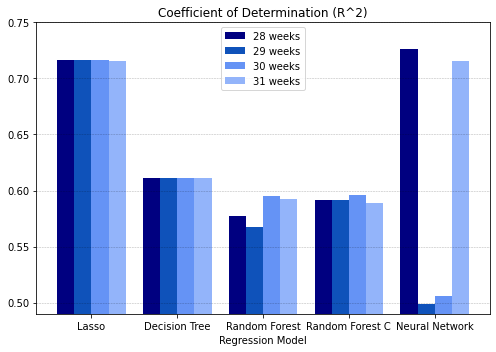

In [109]:
data = np.array([[r2_score(y_pred_28w_lm, test_28w_y), r2_score(y_pred_29w_lm, test_29w_y), r2_score(y_pred_30w_lm, test_30w_y), r2_score(y_pred_31w_lm, test_31w_y)],
                 [r2_score(y_pred_28w_dtr, test_28w_y), r2_score(y_pred_29w_dtr, test_29w_y), r2_score(y_pred_30w_dtr, test_30w_y), r2_score(y_pred_31w_dtr, test_31w_y)],
                 [r2_score(y_pred_28w_rfr, test_28w_y), r2_score(y_pred_29w_rfr, test_29w_y), r2_score(y_pred_30w_rfr, test_30w_y), r2_score(y_pred_31w_rfr, test_31w_y)],
                 [r2_score(y_pred_28w_rfrc, test_28w_y), r2_score(y_pred_29w_rfrc, test_29w_y), r2_score(y_pred_30w_rfrc, test_30w_y), r2_score(y_pred_31w_rfrc, test_31w_y)],
                 [r2_score(y_pred_28w_nn, test_28w_y), r2_score(y_pred_29w_nn, test_29w_y), r2_score(y_pred_30w_nn, test_30w_y), r2_score(y_pred_31w_nn, test_31w_y)]])
length = len(data)
x_labels = ['Lasso', 'Decision Tree', 'Random Forest', 'Random Forest C', 'Neural Network']

# Set plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='#000080', label='28 weeks')
ax.bar(x + width, data[:,1], width, color='#0F52BA', label='29 weeks')
ax.bar(x + (2 * width), data[:,2], width, color='#6593F5', label='30 weeks')
ax.bar(x + (3 * width), data[:,3], width, color='#93b4fa', label='31 weeks')

ax.set_ylim(0.49,0.75)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Regression Model')
ax.set_title('Coefficient of Determination (R^2)')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()